# Raíces

In [1]:
import numpy as np

print("Método de Newton, para introducir funciones de numpy, escribir primero np.")
# Pedimos al usuario que introduzca su función y su derivada
expr = input("Introduce tu función: ")
df_expr = input("Introduce la derivada de tu función: ")

# Convertimos las expresiones del usuario en funciones de numpy
# lambda x define una nueva función anónima que toma un argumento x,
# y eval(expr) evalúa el texto introducido por el usuario como una expresión de Python.
f = lambda x: eval(expr)
df = lambda x: eval(df_expr)

# Pedimos al usuario que introduzca el valor inicial, la tolerancia y el número máximo de iteraciones
p0 = eval(input("Introduce el valor inicial p0: "))
TOL = float(input("Introduce la tolerancia: "))
N0 = int(input("Introduce el número máximo de iteraciones: "))

def newton(p0, TOL, N0):
    i = 1 # Contador de iteraciones
    while (i <= N0):
        p = p0 - f(p0) / df(p0) # Aplicamos el método de Newton
        if abs(p - p0) < TOL: # Si la diferencia es menor que la tolerancia, hemos encontrado la raíz
            print(f"El procedimiento fue exitoso y la raíz obtenida es {p}")
            print(f"se hicieron {i} iteraciones")
            return
        i += 1 # Actualizamos el contador de iteraciones
        p0 = p # Actualizamos el valor de p0 para la siguiente iteración
    # Si llegamos a este punto, el método no encontró una raíz en el número máximo de iteraciones
    if i == N0:
        print("El algoritmo llegó al número máximo de iteraciones definido")
# Llamamos a nuestra función con los valores proporcionados por el usuario
newton(p0, TOL, N0)

Método de Newton, para introducir funciones de numpy, escribir primero np.


Introduce tu función:  np.cos(x)-x
Introduce la derivada de tu función:  -np.sin(x)-1
Introduce el valor inicial p0:  np.pi/4
Introduce la tolerancia:  0.00001
Introduce el número máximo de iteraciones:  1000


El procedimiento fue exitoso y la raíz obtenida es 0.739085133215161
se hicieron 3 iteraciones


In [2]:
import numpy as np

# Pedimos al usuario que introduzca sus funciones
expr1 = input("Introduce tu primera función f(x, y): ")
expr2 = input("Introduce tu segunda función g(x, y): ")

# Convertimos las expresiones del usuario en funciones de numpy
f = lambda x, y: eval(expr1)
g = lambda x, y: eval(expr2)

# Pedimos al usuario que introduzca los intervalos, la tolerancia y el número máximo de iteraciones
a = float(input("Introduce el límite inferior del intervalo para x: "))
b = float(input("Introduce el límite superior del intervalo para x: "))
c = float(input("Introduce el límite inferior del intervalo para y: "))
d = float(input("Introduce el límite superior del intervalo para y: "))
tol = float(input("Introduce la tolerancia: "))
n0 = int(input("Introduce el número máximo de iteraciones: "))

def biseccion_bidimensional(a, b, c, d, tol, n0):
    # Método de bisección bidimensional
    i = 0
    while ((b-a)/2 >= tol or (d-c)/2 >= tol) and (i < n0): # comparamos la longitud de los intervalos con la tolerancia y verificamos que no se exceda el número máximo de iteraciones
        m = (a+b)/2 # encontramos el valor medio en x
        n = (c+d)/2 # encontramos el valor medio en y
        if f(m, n) == 0 and g(m, n) == 0: # si se encuentran ya las raices, el ciclo se detiene
            break
        elif np.sign(f(a, n)) != np.sign(f(m, n)): # verificamos los signos en x
            b = m
        else:
            a = m
        if np.sign(g(m, c)) != np.sign(g(m, n)): # verificamos los signos en y
            d = n
        else:
            c = n
        i += 1
    if i == n0:
        print("Se llegó al número máximo de iteraciones")
    else:
        print (f"Las raíces de las funciones son x = {m}, y = {n}")
    print (f"se hicieron {i} iteraciones")

# Llamamos a la función bisección con los valores proporcionados por el usuario
biseccion_bidimensional(a, b, c, d, tol, n0)

Introduce tu primera función f(x, y):  x**2+y**2-4
Introduce tu segunda función g(x, y):  x-y
Introduce el límite inferior del intervalo para x:  -3
Introduce el límite superior del intervalo para x:  3
Introduce el límite inferior del intervalo para y:  -3
Introduce el límite superior del intervalo para y:  3
Introduce la tolerancia:  0.0001
Introduce el número máximo de iteraciones:  1000


Las raíces de las funciones son x = -0.37518310546875, y = -1.50018310546875
se hicieron 15 iteraciones


# Integrales
Calcular el area de la región limitada por las gráficas y = -x^2 + 6x, y= x^2 - 2x

In [6]:
import numpy as np

# Definimos la función a integrar
def f(x):
    return -x**2+6*x-(x**2-2*x)

# Definimos los limites de la integral
a = -2
b = 0
# Definimos el número de puntos de la cuadratura
N = 4

# Polinomios de Legendre
def legendre(n, x):
    if n == 0: # Si n = 0, entonces el polinomio de Legendre es 1
        return x*0 + 1.0
    elif n == 1: # Si n = 1, el polinomio de Legendre es x
        return x
    else: # Para n mayor a 1, el polinomio de Legendre se calcula por recursividad
        return ((2.0*n-1.0)*x*legendre(n-1,x)-(n-1)*legendre(n-2,x))/n

# Derivada de los polinomios de Legendre    
def dlegendre(n, x):
    x = np.array(x)
    if n == 0: # Si n es 0, la derivada da 0
        return x*0
    elif n == 1: # si n es 1, la derivada es 1
        return x*0 + 1.0
    else: # Para n mayor que 1, la derivada se calculará por recursividad y la regla del producto para derivadas
        return (n/(x**2-1.0))*(x*legendre(n,x)-legendre(n-1,x))

# Definimos un método de la secante para encontrar las raíces de los polinomios de Legendre
# Mi método de la secante:
def secv1(f, p0, p1, TOL=1e-5, N0=100):
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= N0:
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if abs(p - p1) < TOL:
            return p
        i += 1
        p0, q0 = p1, q1
        p1, q1 = p, f(p)
    print("Se alcanzó el número máximo de iteraciones")
    return p

# Calculamos las raíces de los polinomios con el método de la secante
def legroots(n, delt=.2, Nit=1000, error='dist', eps=1e-05):
    roots = np.zeros(n) # iniciamos en ceros un arreglo donde se almacenan las raíces
    npos = n//2 # pq son simétricos
    
    f = lambda x: legendre(n, x)  # recordar que da dos salidas y quiero solo el Pn
    for i in range(npos): # Para cada punto hasta la mitad de puntos
        p0 = np.cos(np.pi*(4*i+3)/(4*n+2))  # semilla o aproximación para el método de la secante
        p1 = p0 + delt # La semilla para p1
        root = secv1(f, p0, p1, TOL=eps, N0=Nit) # Encontramos las raices
        roots[i] = -root # Almacenamos los negativos en el arreglo
        roots[-1-i] = root # Almacenamos los positivos en el arreglo
    return roots # Devolvemos un arreglo de las raíces encontradas

# Calculamos pesos y nodos para la cuadratura
def gau_param(n, delt=.2, Nit=1000, error='dist', eps=1e-05): 
    # Las raíces encontradas ahora son los nodos para la cuadratura
    xroot = legroots(n, delt=delt, Nit=Nit, error=error, eps=eps)
    dPn = legendre(n, xroot)[1] # Calculamos la derivada de los polinomios en los nodos
    # Pesos para la cuadratura
    cj = 2.0 / ((1.0 - xroot**2) * (dlegendre(N, xroot)**2))
    return xroot, cj # Devuelve nodos y pesos

# Calculamos la integral en los intervalos dados
def gauInt(f, interv, Npts, delt=0.2, Nit=1000, error='dist', eps=1e-05):
    a, b = min(interv), max(interv) # Nuestros limites de integración
    
    # Utilizamos los nodos y los pesos en estas nuevas variables
    xs, cs = gau_param(Npts, delt=delt, Nit=Nit, error=error, eps=eps)
    
    # Aplicando la fórmula, cambio de variables
    coeffp = 0.5*(b+a)
    coeffm = 0.5*(b-a)
    
    ts = coeffp + coeffm*xs # Nueva función t
    fk = cs*f(ts) # Calculamos los valores de la función en los nodos y multiplicamos por los pesos
    val = coeffm*np.sum(fk) # Hacemos la suma de los valores y multiplicamos por el coeficiente
    return val # El resultado de nuestra integral

interv = [-2., 0.] # Intervalo
val = gauInt(f, interv, N, eps=1e-11)
print('El resultado es ', abs(val))


El resultado es  21.33333333333333


# Derivadas

Analytical derivative at x = 0.5:  2.506761534986893

Forward Difference Method:
h: 1e-01, Derivative: 2.1990570766492690
h: 1e-02, Derivative: 2.4807256192968197
h: 1e-03, Derivative: 2.5042064928371133
h: 1e-04, Derivative: 2.5065065168927703
h: 1e-05, Derivative: 2.5067360380326420
h: 1e-06, Derivative: 2.5067589857208361
h: 1e-07, Derivative: 2.5067612785534266
h: 1e-08, Derivative: 2.5067615538887367
h: 1e-09, Derivative: 2.5067619091601046
h: 1e-10, Derivative: 2.5067636855169440
h: 1e-11, Derivative: 2.5067947717616335

Central Difference Method:
h: 1e-01, Derivative: 2.4932959255171205
h: 1e-02, Derivative: 2.5066264877375843
h: 1e-03, Derivative: 2.5067601844748211
h: 1e-04, Derivative: 2.5067615214791061
h: 1e-05, Derivative: 2.5067615348373096
h: 1e-06, Derivative: 2.5067615352369899
h: 1e-07, Derivative: 2.5067615361251683
h: 1e-08, Derivative: 2.5067615538887367
h: 1e-09, Derivative: 2.5067614650708947
h: 1e-10, Derivative: 2.5067636855169440
h: 1e-11, Derivative: 2.506750

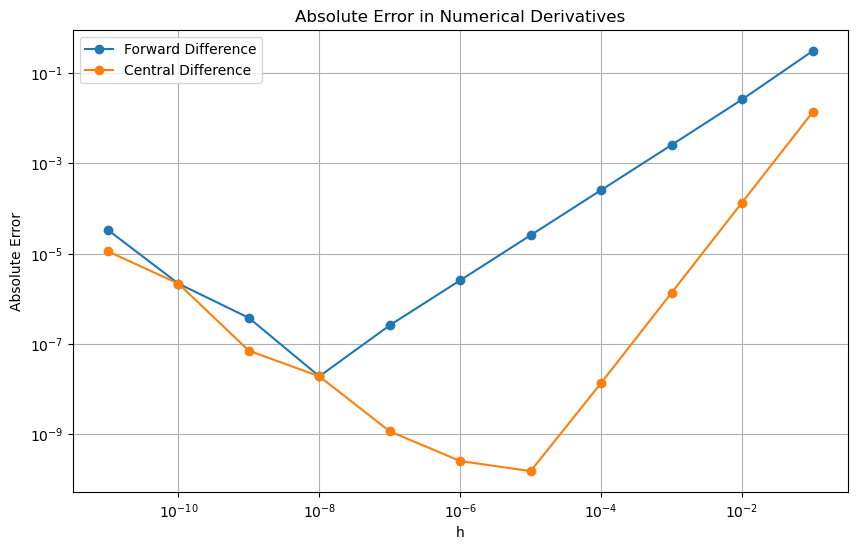

In [7]:
### Diferencias finitas ###
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(np.sin(2*x)) # Definimos nuestra función e^sen(2x)

def fprime(x):
    return 2*np.exp(np.sin(2*x))*np.cos(2*x) # Definimos la derivada analítica de la función 2*e^sen(2x)*cos(2x)

# Derivada hacia adelante
def calc_fd(f,x,h):
    fd = (f(x+h) - f(x))/h
    return fd

# Derivada central
def calc_cd(f,x,h):
    cd = (f(x+h/2) - f(x-h/2))/h
    return cd

x = 0.5 # Se define el valor de x
an = fprime(x) # Para la solución analítica evaluamos la expresión de la derivada en el valor de x
hs = [10**(-i) for i in range(1,12)] # Creamos una lista con los valores de h que van desde 1e-1 hasta 1e-11
fds = [calc_fd(f,x,h) for h in hs] # Calculamos el valor de la derivada hacia adelante para cada valor de h en hs
cds = [calc_cd(f,x,h) for h in hs] # Calculamos el valor de la derivada central para cada valor de h en hs

print("Analytical derivative at x = 0.5: ", an) # Imprimimos el resultado analítico

print("\nForward Difference Method:")
for h, fd in zip(hs, fds): # Creamos una tupla con los valores de hs y fd
    print("h: {0:1.0e}, Derivative: {1:1.16f}".format(h, fd)) # Imprimimos los resultados con el formato específico

print("\nCentral Difference Method:")
for h, cd in zip(hs, cds): # Creamos una tupla con los valores de hs y cd
    print("h: {0:1.0e}, Derivative: {1:1.16f}".format(h, cd)) # Imprimimos los resultados con el formato específico

plt.figure(figsize=(10,6))
# Mostramos una gráfica con los errores absolutos de cada método
plt.loglog(hs, [abs(fd - an) for fd in fds], marker='o', label='Forward Difference')
plt.loglog(hs, [abs(cd - an) for cd in cds], marker='o', label='Central Difference')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.title('Absolute Error in Numerical Derivatives')
plt.show()

# Ecuaciones diferenciales

In [19]:
# Método de euler hacia adelante para ecuaciones diferenciales
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
# Definimos una función euler que toma como argumentos:
def euler(f,a,b,n,y0): # Función, intervalo a,b donde se resuelve la ecuación, número de puntos y el valor de y0
    h = (b-a)/(n-1) # Se calcula el tamaño del paso h que se utilizará en el método
    xi = np.linspace(a,b,n) # generamos un array xi de n números igualmente espaciados entre a y b.
    yval = np.zeros(n) # Iniciamos un array en ceros para almacenar los valores de la solución en cada punto
    y = y0 # inicializamos y en y0
    for j,x in enumerate(xi): # ciclo que recorre j en cada valor de x en xi
        yval[j] = y # almacenamos el valor actual de y en un array de valores de y
        y = y + h*f(x, y) # Calculamos y actualizamos cada valor de y utilizando la fórmula
    return xi, yval # return los arreglos con los valores de x y los valores solución y

xi, yval = euler(f,a,b,n,y0) # Llamada de la función

In [18]:
# Método de Euler hacia atrás

# Utilizamos el método de bisección para encontrar la raíz de la ecuación implícita (y(i+1) - y(i) - h*f(x(i+1), y(i+1)) = 0)
def biseccion(f, a, b, x, y, h, tol=1e-6): # función, intervalo a,b donde se busca la raiz, valor de x donde se evalua, valor anterior de y, tolerancia
    c = a # Inicializamos el valor medio en a
    while ((b-a) >= tol): # Aseguramos la tolerancia definida
        c = (a+b)/2 # Método de bisección, se actualiza el valor de c
        if (c - y - h*f(x, c) == 0.0): # Verificamos si se ha encontrado una raíz de la ecuación
            break # Si es asi, se rompe el bucle
        elif ((c - y - h*f(x, c))*(a - y - h*f(x, a)) < 0): # Cambio de signos
            b = c # Se actualiza el valor a b
        else:
            a = c # El valor se actualiza a a
    return c # Return raiz encontrada

def euler_atras(f, a, b, n, y0): # función para el método
    h = (b-a)/(n-1) # tamaño del peso
    x = np.linspace(a, b, n) # x será un arreglo de n números equi espaciados entre a y b
    y = np.zeros(n) # y será un arreglo de ceros donde se irán almacenando los resultados
    y[0] = y0 # iniciamos en y0

    for i in range(n-1): # se ejecuta un ciclo n-1 veces porque este método ocupa el valor de y(i+1) para calcular y(i)
        # Se calcula el valor de la y siguiente
        # La función bisección recibe como entrada la función, el valor de y actual, el valor de y en el paso siguiente, el valor de x siguiente
        # el ahora valor actual de y y el tamaño del paso
        y[i+1] = biseccion(f, y[i], y[i] + h*f(x[i], y[i]), x[i+1], y[i], h)

    return x, y # return, los arreglos que contienen los valores  de x y y

x, y = euler_atras(f, a, b, n, y0) # llamada de la función

In [17]:
# Método Runge-Kutta de cuarto orden (RK4)
def rk4(f, a, b, n, y0):
    h = (b-a)/(n-1)
    x = np.linspace(a, b, n)
    y = np.zeros(n)
    y[0] = y0

    for i in range(n-1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, y

xs, ys = rk4(f, a, b, n, y0)

In [16]:
def f(x, y):
    return (x-y)/x

# Parámetros iniciales
a = 1
b = 2
n = 100
y0 = 1

# Método de Euler hacia adelante
xi, yval = euler(f, a, b, n, y0)

# Método de Euler hacia atrás
x, y = euler_atras(f, a, b, n, y0)

# Método de Runge-Kutta de cuarto orden
xs, ys = rk4(f, a, b, n, y0)

In [14]:
c = -0.5
anl = lambda x: (x/2)-(c/x)

# Calcular la solución analítica
yval_analitica = anl(xi)

<Figure size 640x480 with 0 Axes>

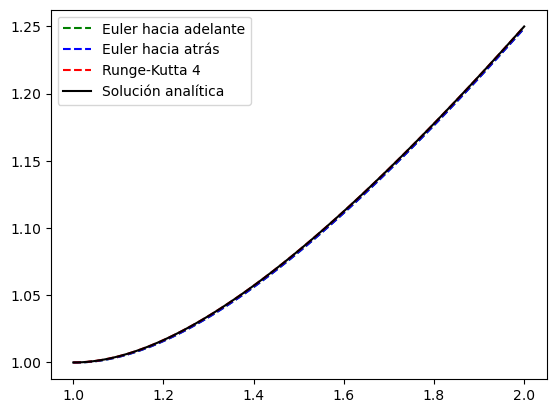

In [13]:
plt.figure()

fig, ax = plt.subplots()

ax.plot(xi, yval, 'g--', label='Euler hacia adelante')
ax.plot(x, y, 'b--', label='Euler hacia atrás')
ax.plot(xs, ys, 'r--', label='Runge-Kutta 4')
ax.plot(xi, yval_analitica, 'k', label='Solución analítica')

ax.legend()

plt.show()

plt.close()

# Interpolación
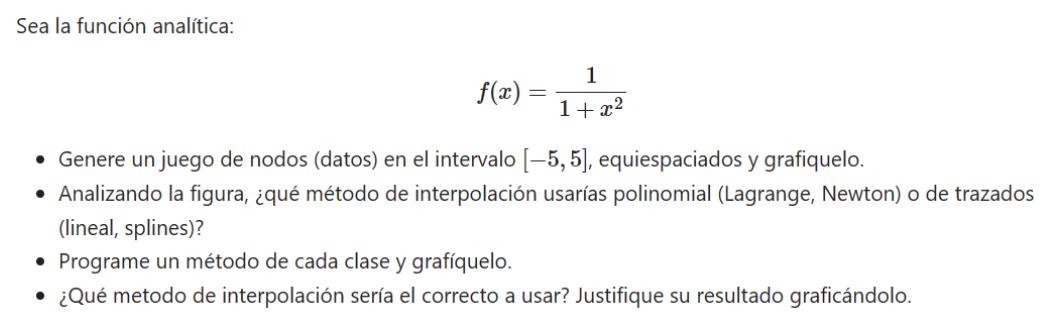

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


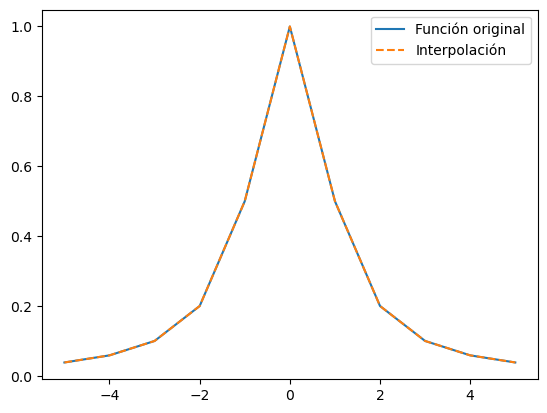

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def legendre(dataxs, x):
    n = dataxs.size
    l = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            l[k] *= ((x - dataxs[j]) / (dataxs[k] - dataxs[j]))
    return l

def general(dataxs, datays, l, x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        val = np.sum(datays * l)
    else:
        val = datays[k[0]]
    return val

func = lambda x: 1/(1+x**2)

# Definimos 11 puntos de -5 a 5 y se evalua la función en los puntos
dataxs = np.linspace(-5,5,11) 
datays = func(dataxs)

# Calculamos los coeficientes de Lagrange para los puntos generados y cada valor de x.
l_values = [legendre(dataxs, x) for x in dataxs]

# Calculamos el valor de la interpolación de Lagrange para cada valor de x.
pofx_values = [general(dataxs, datays, l, x) for l, x in zip(l_values, dataxs)]

# Imprimimos el resultado de cada interpolación en cada punto
for i, pofx in enumerate(pofx_values):
    print(f"El resultado de la interpolación en el punto {dataxs[i]} es {pofx}")

# Graficamos la función original
plt.plot(dataxs, func(dataxs), label='Función original')

# Graficamos la interpolación
plt.plot(dataxs, pofx_values, '--', label='Interpolación')

# Agregamos una leyenda
plt.legend()

# Mostramos la gráfica
plt.show()

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


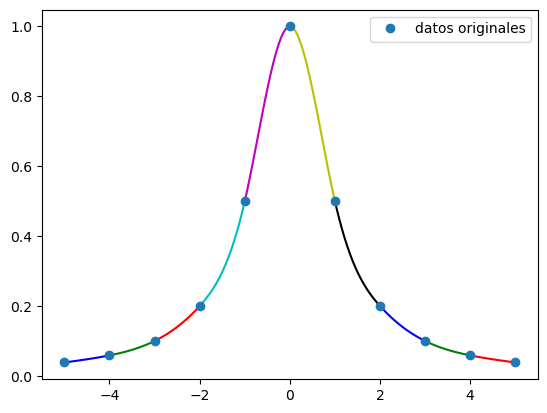

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def computecs(dataxs,datays):
    n = dataxs.size
    A = np.zeros((n-2, n-2))
    np.fill_diagonal(A, 2*(dataxs[2:]-dataxs[:-2]))
    np.fill_diagonal(A[1:,:], dataxs[2:-1]-dataxs[1:-2])
    np.fill_diagonal(A[:,1:], dataxs[2:-1]-dataxs[1:-2])
    b1 = (datays[2:]-datays[1:-1])/(dataxs[2:]-dataxs[1:-1])
    b2 = (datays[1:-1]-datays[:-2])/(dataxs[1:-1]-dataxs[:-2])
    bs = 6*(b1 - b2)
    cs = np.zeros(n)
    cs[1:-1] = np.linalg.solve(A, bs)
    return cs

def splineinterp(dataxs,datays,cs,x):
    k = np.argmax(dataxs>x)
    xk = dataxs[k]; xk1 = dataxs[k-1]
    yk = datays[k]; yk1 = datays[k-1]
    ck = cs[k]; ck1 = cs[k-1]
    val = yk1*(xk-x)/(xk-xk1) + yk*(x-xk1)/(xk-xk1)
    val -= ck1*((xk-x)*(xk-xk1) - (xk-x)**3/(xk-xk1))/6
    val -= ck*((x-xk1)*(xk-xk1) - (x-xk1)**3/(xk-xk1))/6
    return val

# Definimos la misma función que en el código anterior
func = lambda x: 1/(1+x**2)

# Definimos 11 puntos de -5 a 5 y se evalua la función en los puntos
dataxs = np.linspace(-5,5,11) 
datays = func(dataxs)

# Se calculan los coeficientes del spline cúbico
cs = computecs(dataxs, datays)

# Resultados
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(dataxs)-1):
    xi = np.linspace(dataxs[i], dataxs[i+1], 100)
    yi = [splineinterp(dataxs, datays, cs, x_val) for x_val in xi]
    plt.plot(xi, yi, colors[i % len(colors)])

# Graficar los puntos de datos originales
plt.plot(dataxs, datays, 'o', label='datos originales')

# Imprimir los resultados de la interpolación en cada punto
for i, x_val in enumerate(dataxs):
    pofx = splineinterp(dataxs, datays, cs, x_val)
    print(f"El resultado de la interpolación en el punto {x_val} es {pofx}")

plt.legend()
plt.show()

# Fitting

In [22]:
# Code
import numpy as np
import matplotlib.pyplot as plt

def phi(n,k,x):
    if n==2:
        val = x**k
    elif n==3:
        val = x**k
    return val

def normalfit(dataxs,datays,datasigs,n):
    N = dataxs.size
    A = np.zeros((N,n))
    for k in range(n):
        A[:,k] = phi(n,k,dataxs)/datasigs
    bs = datays/datasigs
    cs = np.linalg.solve(A.T@A, A.T@bs)
    chisq = np.sum((bs - A@cs)**2)
    return cs, chisq

np.random.seed(45379)
dataxs = np.array([34,27,65,20,53,49,42,31,55,61])
datays = np.array([4.5,3,7,3.5,8,5,4,4,5.5,7.5])
datasigs = 0.5

In [23]:
np.random.seed(45379) # Dejamos la misma semilla 45379
dataxs = np.array([200,220,400,330,210,390,280,140,280,290,380])
datays = np.array([9,6,12,7,5,10,8,4,7,10,14])
datasigs = 0.5

# inciso a)
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)
    print()
    print('El valor para \chi^2 es ', chisq)
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(dataxs.size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  129.86930693069309
El valor para \chi^2 por grado de libertad es:  14.429922992299232
El valor de los parámetros c_i son  [0.38811881 0.02811881]

El valor para \chi^2 es  127.49777985405316
El valor para \chi^2 por grado de libertad es:  15.937222481756645
El valor de los parámetros c_i son  [3.06698241e+00 7.26158688e-03 3.71525901e-05]


In [24]:
cs_lineal = None
cs_cuadratico = None
for n in (2, 3):
    cs, chisq = normalfit(dataxs, datays, datasigs, n)

    if n == 2:
        cs_lineal = cs
    elif n == 3:
        cs_cuadratico = cs

modelo1 = lambda x, c0, c1: c0 + c1*x
modelo2 = lambda x, c0, c1, c2: c0 + c1*x + c2*x**2

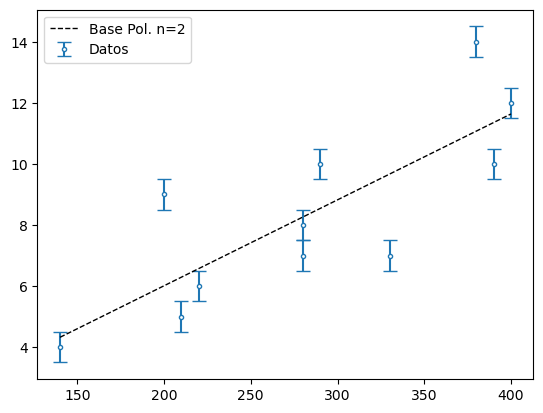

In [25]:
xval = np.linspace(min(dataxs), max(dataxs), 100)
fig, ax = plt.subplots()
ax.errorbar(dataxs, datays, xerr=None, yerr=datasigs, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(xval, modelo1(xval, *cs_lineal), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(cs_lineal))

plt.legend()
plt.show()